# Topic 5/Assignment 4: Computational Proteomics
Group 7: Brian Murphy, Arun Mahtani, Isabelle Johnson, Jackie Kisa, Jacob Swanson

Task 1:
1.	Load the endometrial proteomic data from CPTAC
*	In Python, you can use the cptac package
2.	Load the gene set from ‘filtered_genes_list.txt’
3.	Subset the proteomics dataset to only include genes from step 2
*	I would not recommend trying this with ‘IC_01.rnk’ as calculating the correlation between 7000+ genes will take a long time.
4.	Plot the correlation between pairs of genes using a heatmap
5.	Use a clustermap instead of a heatmap to visualize the correlations (Figure 1)
*	What is the significance of the resulting clustermap?


Task 2:
1.	Run GSEAPreranked using the ‘IC_01.rnk’ file and the ‘Hallmarks’ gene sets
*	Interpret the results
* INFO: ‘IC_01.rnk’ was filtered to produce ‘filtered_genes_list.txt’ used in Task1


In [ ]:
# Mount google drive for GSEA output
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install packages
!pip install -q cptac
!pip install gseapy

     |████████████████████████████████| 5.4MB 3.2MB/s 
     |████████████████████████████████| 112kB 51.8MB/s 
     |████████████████████████████████| 122kB 50.8MB/s 
     |████████████████████████████████| 532kB 5.3MB/s 
     |████████████████████████████████| 225kB 7.6MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 153kB 8.5MB/s 
     |████████████████████████████████| 5.3MB 11.3MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 245kB 43.6MB/s 
  Created wheel for bioservices: filename=bioservices-1.7.9-cp36-none-any.whl size=231635 sha256=4dd216cdc1081678ac1bed03151f60851cd904bdca234b2f67ff0f0a25df8536
  Stored in directory: /root/.cache/pip/wheels/6a/78/4e/4ba6c3e8a62508a4e91d79804a5de6a7f828eca4c8ced44f8c
  Created wheel for easydev: filename=easydev-0.10.1-cp36-none-any.whl size=68367 sha256=b05fd7beda4680c4959e04b0d9b92db2adbb592a336bca82a7304c0c45178fd8
  Stored in directory: /r

In [ ]:
# Load packages
import cptac
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import gseapy
from sklearn import preprocessing

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Creating directory /root/.config/bioservices 


## Task 1

1.	Load the endometrial proteomic data from CPTAC
*	In Python, you can use the cptac package

In [ ]:
cptac.list_datasets()

Available datasets:

Dataset name                               Description  ...                              Publication link
                                                        ...                                              
Brca                                     breast cancer  ...                                      in press
Ccrcc         clear cell renal cell carcinoma (kidney)  ...  https://www.ncbi.nlm.nih.gov/pubmed/31675502
Colon                                colorectal cancer  ...  https://www.ncbi.nlm.nih.gov/pubmed/31031003
Endometrial            endometrial carcinoma (uterine)  ...  https://www.ncbi.nlm.nih.gov/pubmed/32059776
Gbm                                       glioblastoma  ...                                   unpublished
Hnscc                                    head and neck  ...                                   unpublished
Lscc                      lung squamous cell carcinoma  ...                                   unpublished
Luad                     

In [ ]:
cptac.download(dataset="Endometrial")
endo = cptac.Endometrial()
endo.list_data()
help(endo)

Below are the dataframes contained in this dataset:
	acetylproteomics
		Dimensions: (144, 10862)
	circular_RNA
		Dimensions: (109, 4945)
	clinical
		Dimensions: (144, 27)
	CNV
		Dimensions: (95, 28057)
	derived_molecular
		Dimensions: (144, 125)
	experimental_design
		Dimensions: (144, 26)
	followup
		Dimensions: (396, 49)
	miRNA
		Dimensions: (99, 2337)
	phosphoproteomics
		Dimensions: (144, 73212)
	proteomics
		Dimensions: (144, 10999)
	somatic_mutation
		Dimensions: (52560, 3)
	somatic_mutation_binary
		Dimensions: (95, 51559)
	transcriptomics
		Dimensions: (109, 28057)
Help on Endometrial in module cptac.endometrial object:

class Endometrial(cptac.dataset.Dataset)
 |  Note that all cancer datasets are class objects that inherit from cptac.dataset. Therefore
 |  the same function calls exist for cptac.Endometrial, cptac.Colon, etc.
 |  
 |  Method resolution order:
 |      Endometrial
 |      cptac.dataset.Dataset
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __in

In [ ]:
df_prot = endo.get_proteomics(tissue_type='both')
df_prot.head()

Name,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AARSD1,AASDHPPT,AASS,AATF,ABAT,ABCA8,ABCB1,ABCB10,ABCB6,ABCB7,ABCB8,ABCC1,ABCC10,ABCC3,ABCC4,ABCD1,ABCD3,ABCD4,ABCE1,ABCF1,ABCF2,ABCF3,ABCG1,ABHD10,ABHD11,...,ZNF8,ZNF800,ZNF805,ZNF813,ZNF816,ZNF827,ZNF830,ZNF837,ZNF84,ZNF845,ZNF852,ZNF888,ZNFX1,ZNHIT1,ZNHIT2,ZNHIT3,ZNHIT6,ZNRD1,ZNRF1,ZNRF2,ZPR1,ZRANB2,ZRSR2,ZSCAN12,ZSCAN18,ZSCAN2,ZSCAN21,ZSCAN26,ZSCAN30,ZSCAN31,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C3L-00006,-1.180,-0.8630,-0.802,0.222,0.2560,0.6650,1.2800,-0.3390,0.412,-0.664,0.228,-0.4560,-0.256,0.0419,0.8570,-0.1450,-0.1360,-0.304,0.2000,0.0264,-0.3990,-0.48400,0.7960,0.37700,1.190,0.8300,0.814,-0.0376,0.4350,0.916,0.209,0.840,0.778,0.3160,0.248,0.1590,0.2470,0.619,0.5740,0.920,...,-0.1660,0.23900,NaN,-0.000077,NaN,-0.161,-0.42700,NaN,NaN,NaN,NaN,NaN,0.209,0.30600,0.0774,0.489,0.143,-0.0326,0.183,-0.1920,-0.0337,-0.3810,0.1940,NaN,-0.6500,NaN,0.131,-0.1660,NaN,-0.1020,-0.08770,NaN,0.0229,0.1090,NaN,-0.332,-0.43300,-1.020,-0.1230,-0.0859
C3L-00008,-0.685,-1.0700,-0.684,0.984,0.1350,0.3340,1.3000,0.1390,1.330,-0.367,-0.813,0.0120,0.126,-0.2630,0.0102,0.3550,0.0000,-0.426,0.0177,-0.4920,-0.2680,-0.68800,-0.0938,0.17700,0.560,-0.0487,0.482,0.5000,0.0729,-0.679,-0.377,1.290,-0.210,0.1130,0.192,0.5650,0.0484,2.200,0.0337,0.399,...,-0.4670,0.16400,NaN,NaN,NaN,0.278,-0.11700,NaN,1.170,NaN,NaN,NaN,-0.545,0.54800,-0.0306,NaN,0.217,-0.2740,0.860,0.2610,0.3890,-0.3690,0.0188,0.412,-0.9260,1.150,-0.172,-0.0724,NaN,-0.6070,-0.03560,NaN,0.3630,1.0700,0.737,-0.564,-0.00461,-1.130,-0.0757,-0.4730
C3L-00032,-0.528,-1.3200,0.435,NaN,-0.2400,1.0400,-0.0213,-0.0479,0.419,-0.500,-0.403,0.0409,-0.195,0.1750,-0.2700,-0.0604,-0.1080,-0.834,-0.3190,-0.7850,-0.0144,-0.00797,0.3990,-0.00766,0.547,0.7630,0.163,0.7390,-0.6570,0.775,-0.195,0.908,0.114,0.0928,0.136,0.0025,0.3220,1.310,0.3760,0.892,...,-0.2390,-0.35400,NaN,NaN,NaN,0.145,-0.51900,-0.46900,-0.367,2.79,0.0448,NaN,-0.179,0.00864,0.2900,0.123,0.101,-0.1660,0.157,-0.0968,0.0328,0.0232,NaN,NaN,-0.0452,NaN,-0.355,-0.5910,NaN,0.2780,0.00112,-0.1450,0.0105,-0.1160,NaN,0.151,-0.07400,-0.540,0.3200,-0.4190
C3L-00090,-1.670,-1.1900,-0.443,0.243,-0.0993,0.7570,0.7400,-0.9290,0.229,-0.223,-0.154,-0.1470,0.287,-0.0767,-0.3340,0.1680,-0.2950,1.160,0.3380,-0.4390,-0.5830,-0.36300,0.2270,0.30700,0.375,0.7160,0.675,-0.0640,0.0822,1.510,0.239,1.020,1.130,-0.0142,0.138,0.0126,-0.0746,0.873,0.1720,1.410,...,-0.1230,-0.00251,NaN,0.092700,NaN,-0.148,-0.00251,NaN,-0.260,1.06,NaN,-0.2490,0.156,-0.13200,0.1760,0.038,-0.840,-0.2660,-0.285,-0.0950,0.2190,-0.3110,0.0341,NaN,-0.8810,NaN,-0.131,-0.1910,-0.399,-0.0974,0.07250,-0.0552,-0.0714,0.0933,0.156,-0.398,-0.07520,-0.797,-0.0301,-0.4670
C3L-00098,-0.374,-0.0206,-0.537,0.311,0.3750,0.0131,-1.1000,NaN,0.565,-0.101,-2.860,1.8700,0.198,0.0860,0.3020,0.3250,-0.0495,-1.930,1.1800,-1.0000,-1.0500,-0.41500,0.6720,1.87000,-0.101,0.4510,0.379,NaN,-0.2080,0.698,2.960,0.630,1.190,1.0100,0.291,0.4010,1.2000,-0.916,0.2110,0.514,...,-0.0272,0.65500,NaN,-1.590000,NaN,-0.994,0.36300,0.00973,0.237,NaN,0.1170,0.0919,0.489,-0.11700,-0.0754,0.571,0.825,0.5010,-0.972,0.2380,0.1310,-0.5210,0.3000,-0.736,-1.2400,-0.557,-1.030,-0.6500,NaN,-1.1100,-0.17600,NaN,-1.2200,-0.5620,0.937,-0.646,0.20700,-1.850,-0.1760,0.0513


2.	Load the gene set from ‘filtered_genes_list.txt’

In [ ]:
filtered = pd.read_csv('https://raw.githubusercontent.com/bmurphy1993/NYU_bioinformatics_ass_4/main/filtered_genes_list.txt',
                       header=None)[0].to_list()
len(filtered)

78

3.	Subset the proteomics dataset to only include genes from step 2
*	I would not recommend trying this with ‘IC_01.rnk’ as calculating the correlation between 7000+ genes will take a long time.

In [ ]:
df_prot_filtered = df_prot[filtered]
print(df_prot_filtered.shape)
df_prot_filtered.head()

(144, 78)


Name,SLC1A5,KRT5,NFYA,ADGRG1,CAPS,SFN,DKK4,TTYH3,TPM3,HAPLN3,CFAP97,RHBDD2,LAMC3,CTIF,FADS2,DNAJB14,TSR2,LAD1,MELTF,MRPL51,SYNPO2,FAM20B,TRIM26,KANK4,TUBA1B,COA6,SLC26A6,TFF3,ADGRE5,STARD7,PLPP2,MMP7,MFAP4,KCTD12,CD34,PAGE4,GMFG,MZB1,UBE2Z,RPS16,TGFBI,CALB2,BAG2,TAB3,STX10,FKBP11,IGLL5,RPS9,RBP4,WDR73,RPL35,RNASE2,MSL1,ALDH1A1,TTR,SEC11C,PLAC9,MRPL13,VCAN,RPL30,ILK,HPGD,C7,USP1,KIAA2013,SOD3,OLFML3,TRIM68,PCBD1,POLRMT,ENTPD5,ARRDC1,LSM5,VCL,THBS4,PRKCSH,CLC,CD59
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C3L-00006,0.263,0.634,-0.1080,-0.101,1.270,-0.22300,-0.261,0.322,-0.976,2.190,-0.00755,0.613,-1.4100,-0.3830,1.050,0.361,-0.2800,0.320,-2.130,0.9030,-0.823,-0.0550,-0.2410,0.511,-0.409,0.967,1.170,-1.100,-0.549,0.1140,0.901,2.00,-2.420,-1.530,-1.240,-0.987,-0.5610,-0.1460,-0.05320,-0.2350,-1.400,0.120,-1.360,-0.731,0.466,-0.191,-1.730,0.707,-1.0400,-0.068,0.1970,-0.380,0.396,-0.318,-1.040,0.994,-0.359,0.5270,0.271,0.3310,-0.460,0.670,-0.840,-0.0276,0.417,-0.823,-0.95300,-0.1000,-0.279,0.684,0.1430,0.118,0.316,-0.811,-0.575,0.1570,-1.5500,0.306
C3L-00008,1.420,-1.160,-0.4830,1.040,2.490,-0.10600,0.611,1.060,-0.762,1.680,-0.36400,1.150,-0.0246,-0.2770,1.750,0.211,0.0666,0.850,-0.805,0.5930,-1.400,0.3220,0.3530,0.564,-0.395,-0.072,0.374,3.610,-1.670,-0.3420,1.580,-1.35,-2.350,-1.810,-0.812,-1.580,-1.0900,-1.5400,-0.00727,0.5830,1.160,-2.390,-0.303,-0.395,0.557,-0.315,-0.355,0.782,-0.6420,0.513,0.8320,-0.364,0.216,-2.300,-1.220,0.816,-2.310,0.5430,0.635,0.5360,-0.737,-0.586,-0.236,0.2920,0.559,-2.070,-0.70500,1.0600,-0.837,0.461,1.4100,0.458,-0.341,-0.674,-0.659,0.0315,-0.1920,-0.429
C3L-00032,1.110,0.517,-0.0152,0.338,1.900,0.00883,-0.909,0.606,-1.700,-0.840,0.13700,0.614,-0.3590,-0.0802,1.140,0.282,-0.2290,0.208,-1.930,-0.0832,-0.346,-0.0534,0.0988,0.392,-0.425,0.964,0.367,2.020,-0.239,-0.0632,0.692,-0.23,-0.442,-0.222,-0.471,0.637,0.7290,1.8400,0.14900,0.0603,-0.258,0.205,-0.471,-0.201,0.114,1.090,-0.577,0.406,-0.0926,0.795,-0.6290,-0.241,-0.506,1.020,-0.778,1.500,-0.402,-0.0672,-1.100,0.4070,-0.354,0.689,-0.610,-0.0100,0.311,-0.550,-0.00145,-0.0822,-0.091,0.677,0.8970,-0.242,-0.332,-0.345,-0.406,-0.1660,-0.0719,0.308
C3L-00090,-0.651,0.508,-0.0361,0.478,0.758,0.46000,1.100,0.383,0.223,-1.020,0.11100,-0.327,0.5680,-0.5130,0.957,0.311,0.0563,0.107,-0.740,-0.0283,-1.740,0.0697,0.0639,-1.440,-0.350,0.813,0.648,-0.733,-0.684,0.3340,2.150,-0.86,-3.270,-1.060,-0.211,-2.560,-0.5200,-0.0114,-0.06220,0.4410,-1.460,-0.765,-1.090,-0.526,0.396,0.677,-0.879,-0.163,-1.3900,0.251,0.0537,-0.108,-0.445,-0.630,-1.700,-0.122,-1.870,0.0654,-1.330,-0.1460,-0.627,2.980,-1.290,-0.2950,0.386,-2.590,-1.03000,-0.1780,1.550,0.470,0.2520,0.161,-0.346,-0.812,-0.443,-0.2000,-3.8500,-0.610
C3L-00098,1.080,-1.310,-0.2020,0.944,-0.845,1.28000,-1.700,0.227,-0.170,0.121,-0.05650,-1.030,-0.9600,-0.2890,-0.946,-0.124,0.0202,1.160,0.498,-0.0186,-2.880,0.5170,0.4740,-1.670,-0.212,0.601,1.440,-1.280,0.239,0.5670,-2.070,-1.28,-4.810,-0.826,-2.010,-2.470,0.0776,0.9310,-0.15400,0.3190,-2.330,-1.480,-1.610,-0.121,1.150,-1.200,-1.240,-0.398,-0.2490,-0.184,0.4860,-0.549,-0.228,-2.050,-0.689,0.422,-0.768,0.3200,-0.240,0.0353,-1.300,-0.557,-0.546,0.1430,0.361,-2.290,-2.80000,-1.2200,0.254,1.230,-0.0398,0.774,-0.569,-1.990,-2.080,0.3540,-2.2500,-0.872


4.	Plot the correlation between pairs of genes using a heatmap

Text(84.5, 0.5, '')

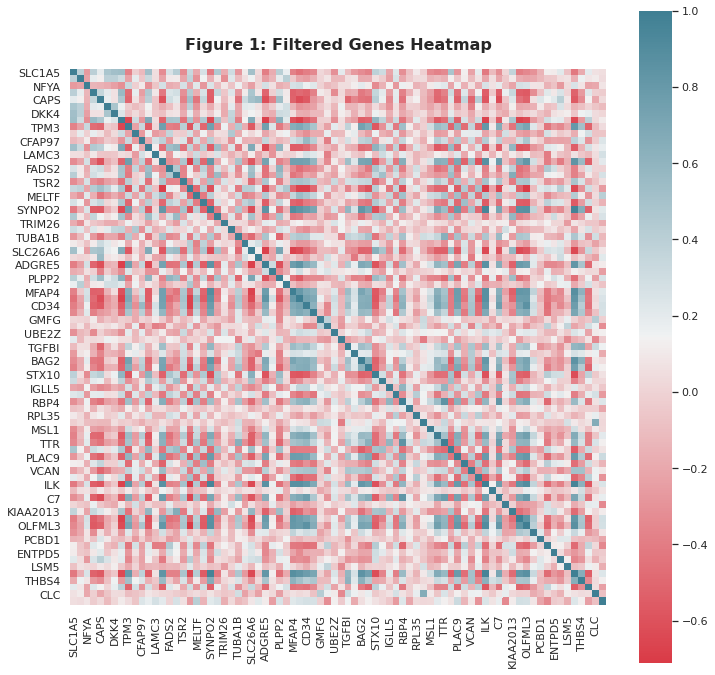

In [ ]:
cmap = sns.diverging_palette(10, 220, sep=1, as_cmap=True)

fig = plt.figure(figsize=(12, 12))

ax = sns.heatmap(df_prot_filtered.corr(), 
                 square=True, 
                 cmap=cmap, 
                 xticklabels=2, 
                 yticklabels=2)
ax.set_title('Figure 1: Filtered Genes Heatmap', pad=20, fontdict={'fontsize':16, 'fontweight':'bold'})
ax.set_xlabel('')
ax.set_ylabel('')

5.	Use a clustermap instead of a heatmap to visualize the correlations (Figure 1)
*	What is the significance of the resulting clustermap?

Text(840.2249999999999, 0.5, '')

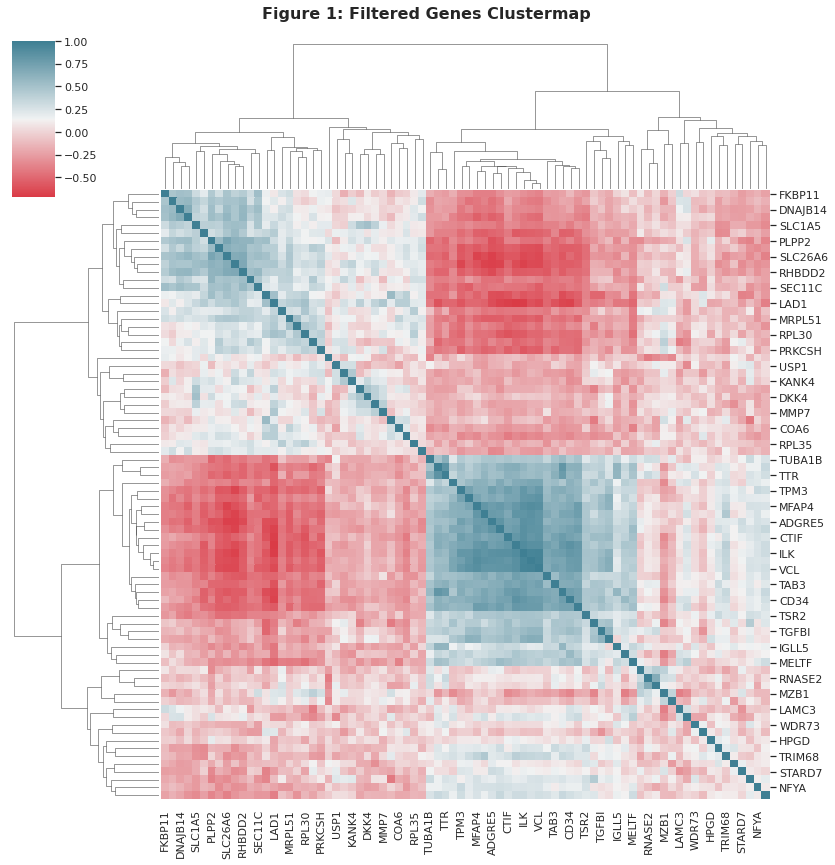

In [ ]:
clust = sns.clustermap(
    df_prot_filtered.corr(), 
    cmap=cmap, 
    figsize=(12, 12))
clust.fig.suptitle('Figure 1: Filtered Genes Clustermap', y=1.02, fontsize=16, fontweight='bold')
ax = clust.ax_heatmap
ax.set_xlabel('')
ax.set_ylabel('')

## Task 2

1.	Run GSEAPreranked using the ‘IC_01.rnk’ file and the ‘Hallmarks’ gene sets
*	Interpret the results
* INFO: ‘IC_01.rnk’ was filtered to produce ‘filtered_genes_list.txt’ used in Task1

In [ ]:
# Load IC_001.rnk
ic_001 = pd.read_csv('https://raw.githubusercontent.com/bmurphy1993/NYU_bioinformatics_ass_4/main/IC_001.rnk',
                     sep='\t',
                     header=None)
ic_001 = ic_001.rename(columns={0:'Name',1:'Exp'})
ic_001.head()

,Name,Exp
0,A1BG,-0.218938
1,A2M,0.123359
2,AAAS,0.085873
3,AACS,-0.981172
4,AAGAB,-1.495759


In [ ]:
# gseapy.get_library_name() # to view other available gene set libraries
gseapy.prerank(rnk=ic_001, 
               gene_sets='MSigDB_Hallmark_2020', 
               outdir='<INSERT PERSONAL GOOGLE DRIVE DIRECTORY>/GSEA_Prerank')

# interpretation guide: https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideFrame.html?_Interpreting_GSEA_Results

Plot results

In [ ]:
# Import GSEApy report csv
report = pd.read_csv('<INSERT PERSONAL GOOGLE DRIVE DIRECTORY>/GSEA_Prerank/gseapy.prerank.gene_sets.report.csv')
report = report.rename(columns={'es':'ES', 'nes':'NES', 'pval':'P-Value', 'fdr':'FDR', 'geneset_size':'Geneset Size', 'matched_size':'Matched Size', 'genes':'Genes', 'ledge_genes':'Ledge Genes'})
report.head()

,Term,ES,NES,P-Value,FDR,Geneset Size,Matched Size,Genes,Ledge Genes
0,Spermatogenesis,-0.539434,-1.747761,0.001976,0.041031,135,40,HSPA2;PSMG1;RAD17;BRAF;CDK1;PEBP1;MAP7;GSTM3;N...,ZC3H14;GAPDHS;CSNK2A2;AGFG1;STRBP;HSPA4L;ALOX1...
1,Cholesterol Homeostasis,-0.484487,-1.643261,0.008214,0.059681,74,45,ALCAM;FABP5;PLAUR;PMVK;ETHE1;ACTG1;ACAT2;S100A...,HSD17B7;GUSB;FDFT1;CYP51A1;CHKA;JAG1;HMGCR;FADS2
2,Wnt-beta Catenin Signaling,-0.584831,-1.536788,0.025490,0.077166,42,16,NOTCH1;CUL1;FZD1;ADAM17;RBPJ;LEF1;HDAC5;HDAC2;...,JAG1;DKK4
3,Hedgehog Signaling,-0.539917,-1.550877,0.043210,0.092319,36,22,MYH9;VEGFA;RTN1;CRMP1;CELSR1;NF1;LDB1;NRCAM;PL...,VLDLR;ADGRG1
4,Apical Junction,0.394021,1.561584,0.003883,0.173099,200,125,CD34;TGFBI;CALB2;VCAN;VCL;MYL12B;FSCN1;PBX2;CL...,CD34;TGFBI;CALB2;VCAN;VCL;MYL12B;FSCN1;PBX2;CL...


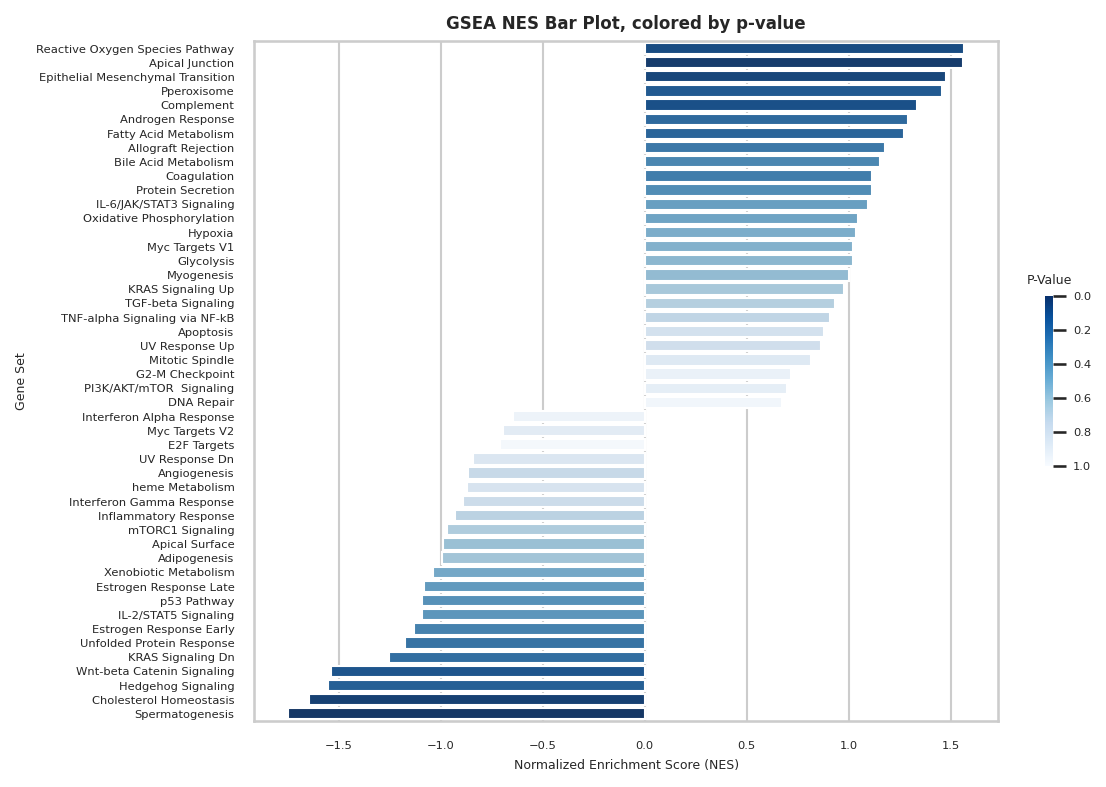

In [ ]:
# NES bar plot with p-values
sns.set(rc={'figure.figsize':(8,6), 'figure.dpi': 150}, font_scale=.5, style='whitegrid')

# Sort by NES
report = report.sort_values(by=['NES'], ascending=False)

# Palette for bars
pal = sns.color_palette('Blues', len(report))
rank = report['P-Value'].argsort().argsort()

# Palette for colorbar legend
norm = plt.Normalize(1, 0)
sm = plt.cm.ScalarMappable(cmap='Blues_r', norm=norm)
sm.set_array([])

# Bar plot
ax = sns.barplot(x='NES', y='Term', data=report, 
                 palette=np.array(pal[::-1])[rank]
                 )
ax.set_title('GSEA NES Bar Plot, colored by p-value', fontdict={'fontsize':8, 'fontweight':'bold'})
ax.set_xlabel('Normalized Enrichment Score (NES)')
ax.set_ylabel('Gene Set')
cbar = ax.figure.colorbar(sm, shrink=.25)
cbar.ax.set_title('P-Value')
cbar.ax.invert_yaxis()
cbar.outline.set_visible(False)

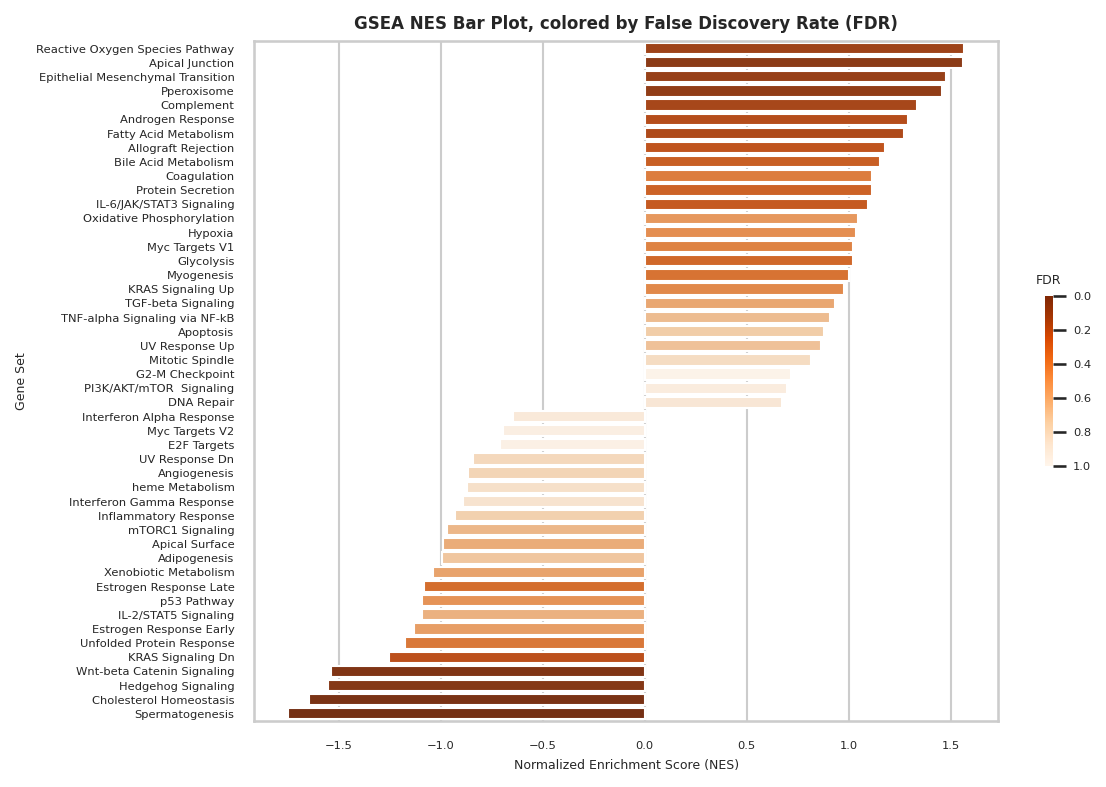

In [ ]:
# NES bar plot with FDR

# Palette for bars
pal = sns.color_palette('Oranges', len(report))
rank = report['FDR'].argsort().argsort()

# Palette for colorbar legend
norm = plt.Normalize(1, 0)
sm = plt.cm.ScalarMappable(cmap='Oranges_r', norm=norm)
sm.set_array([])

# Bar plot
ax = sns.barplot(x='NES', y='Term', data=report, 
                 palette=np.array(pal[::-1])[rank]
                 )
ax.set_title('GSEA NES Bar Plot, colored by False Discovery Rate (FDR)', fontdict={'fontsize':8, 'fontweight':'bold'})
ax.set_xlabel('Normalized Enrichment Score (NES)')
ax.set_ylabel('Gene Set')
cbar = ax.figure.colorbar(sm, shrink=.25)
cbar.ax.set_title('FDR')
cbar.ax.invert_yaxis()
cbar.outline.set_visible(False)